In [63]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [21]:
df = pd.read_csv('exemplo_corponegro.dat', delim_whitespace=True)
ele = pd.DataFrame(data = df.values, columns = ['Comp Onda', '2','3','Energia','5'])
corpo_negro = ele.drop(columns = ['2','3','5'])
Energia = corpo_negro['Energia'] #W/m^3 y
Comp = corpo_negro['Comp Onda'] #m     x
c = 3*10**8 #m/s
h = 6.626070 * 10**-34 #J*s cte de Planck
c1 = 3.37 * 10**(-16) 
c2 = 1.44 * 10**(-2)
#Descobrir a temperatura

In [69]:
def plank(comp,T): #f(x,param)
    c1 = 3.37 * (10**-16) 
    c2 = 1.44 * (10**-2)
    return c1/((comp**5)*(np.exp(c2/(comp*T)) - 1))

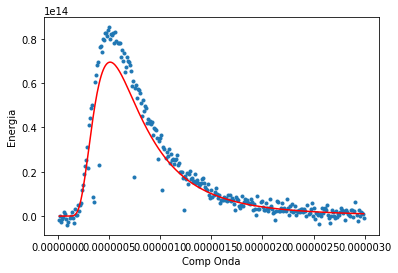

In [70]:
plt.plot(Comp, Energia,'.')
plt.plot(Comp,plank(Comp,5700),label='Ajuste', color='red')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Comp Onda')
plt.ylabel('Energia')
plt.show()

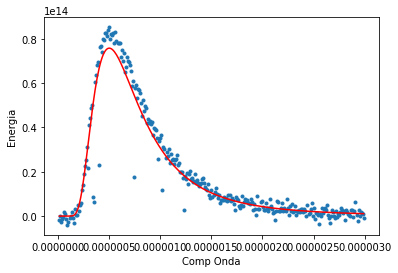

In [71]:
plt.plot(Comp, Energia,'.')
plt.plot(Comp,plank(Comp,5800),label='Ajuste', color='red')
#plt.axvline(24000, color='r', linestyle='dotted', linewidth=2)
plt.xlabel('Comp Onda')
plt.ylabel('Energia')
plt.show()

In [72]:
def residuo_quadrado(data, modelo):
    return np.sum((data - modelo)**2)
modelo = plank(5800, Comp)
residuo_quadrado(Energia, modelo)

2.9875361293179593e+29

In [73]:
param, cov = curve_fit(plank,Comp,Energia,p0=[5800])

In [74]:
param

array([5833.85508826])

In [75]:
cov

array([[201.81789653]])

In [77]:
np.savetxt('saida.txt',np.transpose(np.array([Comp,Energia,plank(Comp,5800)])))